# Data load & make base dir

In [1]:
import os, shutil

In [2]:
original_dataset_dir = './datasets/training_set/training_set'

base_dir = './datasets/cats_and_dogs_small'
# os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# Copy original files to target dir

In [4]:
# Copy cat file
# cat train data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    tmp = os.path.join(original_dataset_dir, "cats")
    src = os.path.join(tmp, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# cat validation data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# type(fnames)
for fname in fnames:
    tmp = os.path.join(original_dataset_dir, "cats")
    src = os.path.join(tmp, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# cat test data copy
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# type(fnames)
for fname in fnames:
    tmp = os.path.join(original_dataset_dir, "cats")
    src = os.path.join(tmp, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

    
# Copy dog file
# dog train data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    tmp = os.path.join(original_dataset_dir, "dogs")
    src = os.path.join(tmp, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# dog validation data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# type(fnames)
for fname in fnames:
    tmp = os.path.join(original_dataset_dir, "dogs")
    src = os.path.join(tmp, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# cat test data copy
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# type(fnames)
for fname in fnames:
    tmp = os.path.join(original_dataset_dir, "dogs")
    src = os.path.join(tmp, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('count training cat image', len(os.listdir(train_cats_dir)))
print('count training dog image', len(os.listdir(train_dogs_dir)))
print('count validation cat image', len(os.listdir(validation_cats_dir)))
print('count validation dog image', len(os.listdir(validation_dogs_dir)))
print('count test cat image', len(os.listdir(test_cats_dir)))
print('count test dog image', len(os.listdir(test_dogs_dir)))

count training cat image 1000
count training dog image 1000
count validation cat image 500
count validation dog image 500
count test cat image 500
count test dog image 500


# Make model

In [6]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# Optimize

In [8]:
from keras import optimizers

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# Data preprocessing

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size = 20, class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [11]:
from IPython.display import display, Image
# from PIL import Image

history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=100, 
    epochs=30, 
    validation_data = validation_generator, 
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 140s 1s/step - loss: 0.6907 - acc: 0.5325 - val_loss: 0.6726 - val_acc: 0.5690
Epoch 2/30
100/100 [==============================] - 142s 1s/step - loss: 0.6656 - acc: 0.6020 - val_loss: 0.6481 - val_acc: 0.6090
Epoch 3/30
100/100 [==============================] - 143s 1s/step - loss: 0.6215 - acc: 0.6570 - val_loss: 0.6353 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 142s 1s/step - loss: 0.5824 - acc: 0.6865 - val_loss: 0.6124 - val_acc: 0.6480
Epoch 5/30
100/100 [==============================] - 142s 1s/step - loss: 0.5461 - acc: 0.7200 - val_loss: 0.6274 - val_acc: 0.6260
Epoch 6/30
100/100 [==============================] - 141s 1s/step - loss: 0.5241 - acc: 0.7325 - val_loss: 0.5965 - val_acc: 0.6570
Epoch 7/30
100/100 [==============================] - 141s 1s/step - loss: 0.4952 - acc: 0.7630 - val_loss: 0.5750 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 142s 1s/step - 

# Save model

In [12]:
model.save('./model/cats_and_dogs_small_1.h5')

# Graph

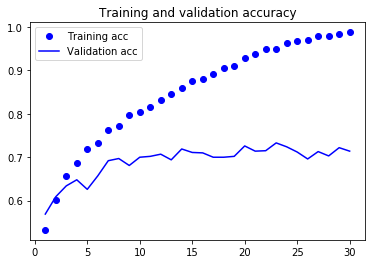

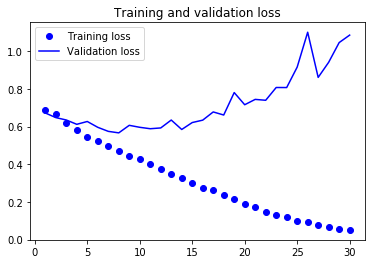

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate model

In [14]:
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150,150), batch_size = 20, class_mode ='binary')

Found 1000 images belonging to 2 classes.


In [15]:
test_loss, test_acc = model.evaluate_generator(test_generator, verbose=1)
print('test loss : ', test_loss)
print('test accuracy : ', test_acc)

50/50 [==============================] - 22s 436ms/step
test loss :  1.018093638420105
test accuracy :  0.7229999995231629


# Data multiplication & Drop out

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150), 
    batch_size=32, 
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [17]:
history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data = validation_generator, 
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 226s 2s/step - loss: 0.6994 - acc: 0.6691 - val_loss: 0.5473 - val_acc: 0.7253
Epoch 2/100
100/100 [==============================] - 224s 2s/step - loss: 0.5737 - acc: 0.6984 - val_loss: 0.5211 - val_acc: 0.7443
Epoch 3/100
100/100 [==============================] - 228s 2s/step - loss: 0.5618 - acc: 0.7062 - val_loss: 0.5061 - val_acc: 0.7456
Epoch 4/100
100/100 [==============================] - 226s 2s/step - loss: 0.5362 - acc: 0.7291 - val_loss: 0.5265 - val_acc: 0.7411
Epoch 5/100
100/100 [==============================] - 226s 2s/step - loss: 0.5427 - acc: 0.7178 - val_loss: 0.5080 - val_acc: 0.7386
Epoch 6/100
100/100 [==============================] - 229s 2s/step - loss: 0.5272 - acc: 0.7278 - val_loss: 0.5713 - val_acc: 0.7418
Epoch 7/100
100/100 [==============================] - 228s 2s/step - loss: 0.5076 - acc: 0.7519 - val_loss: 0.4812 - val_acc: 0.7563
Epoch 8/100
100/100 [==============================] - 227s 2s

Epoch 63/100
100/100 [==============================] - 163s 2s/step - loss: 0.3794 - acc: 0.8350 - val_loss: 0.6318 - val_acc: 0.7519
Epoch 64/100
100/100 [==============================] - 163s 2s/step - loss: 0.3678 - acc: 0.8350 - val_loss: 0.5752 - val_acc: 0.7893
Epoch 65/100
100/100 [==============================] - 163s 2s/step - loss: 0.3594 - acc: 0.8391 - val_loss: 0.4416 - val_acc: 0.8071
Epoch 66/100
100/100 [==============================] - 164s 2s/step - loss: 0.3967 - acc: 0.8131 - val_loss: 0.4497 - val_acc: 0.7912
Epoch 67/100
100/100 [==============================] - 163s 2s/step - loss: 0.3637 - acc: 0.8353 - val_loss: 0.4544 - val_acc: 0.7970
Epoch 68/100
100/100 [==============================] - 162s 2s/step - loss: 0.3767 - acc: 0.8322 - val_loss: 0.4359 - val_acc: 0.7970
Epoch 69/100
100/100 [==============================] - 164s 2s/step - loss: 0.3773 - acc: 0.8353 - val_loss: 0.4292 - val_acc: 0.8103
Epoch 70/100
100/100 [==============================] -

# Save model

In [18]:
model.save('./model/cats_and_dogs_small_2.h5')

# Graph

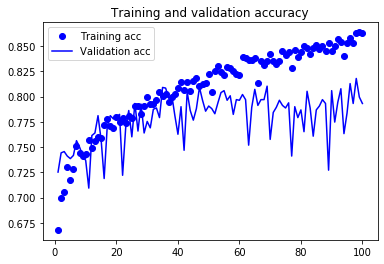

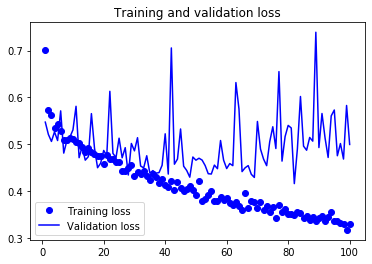

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate model

In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150,150), batch_size = 32, class_mode ='binary')

Found 1000 images belonging to 2 classes.


In [21]:
test_loss, test_acc = model.evaluate_generator(test_generator, verbose=1)
print('test loss : ', test_loss)
print('test accuracy : ', test_acc)

32/32 [==============================] - 16s 494ms/step
test loss :  0.5093520379066467
test accuracy :  0.785
